<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202510_AML/blob/main/Talleres/Taller%201/MINE_4206_202510_AML_Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://docs.google.com/uc?export=download&id=1NUy1Q-abpoV9XYK9qT9t8Mdhj3ZVlveO)


# **Taller 1**

- **Integrante 1:** David Leonardo Almanza Márquez
- **Integrante 2:**

### **Problemática**:
El cambio climático, impulsado por la emisión de gases de efecto invernadero como el CO2, está provocando el calentamiento global y un aumento en los desastres ambientales. La contaminación del aire y la pérdida de biodiversidad son algunas de sus consecuencias, lo que hace necesario establecer políticas y planes de gestión de riesgos para mitigar sus efectos. Una de las estrategias clave es la movilidad sostenible, que busca reducir las emisiones de CO2 mediante alternativas como el uso de vehículos eléctricos y bicicletas. Estas medidas no solo contribuyen a disminuir la contaminación, sino que también mejoran la calidad del aire y la salud pública.

En este contexto, los sistemas de alquiler de bicicletas en ciudades han surgido como una solución efectiva para reducir la congestión vehicular y fomentar el transporte ecológico. Sin embargo, uno de sus principales retos es la distribución desequilibrada de bicicletas en las estaciones, lo que afecta su disponibilidad y la satisfacción de los usuarios. Para optimizar su funcionamiento, se requieren soluciones basadas en datos que permitan predecir la demanda en tiempo real, considerando factores como el clima, la hora del día, la ubicación, etc. Esto facilitaría una mejor gestión del sistema, asegurando que las bicicletas estén disponibles en los momentos y lugares adecuados.

### **Objetivos:**

- Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar la **demanda sobre el uso** de un sistema de alquiler de bicicletas siguiendo el ciclo de machine learning.
- Determinar cuáles son los factores que más inciden en la demanda con base en los datos.


> Nota: Los datos y el diccionario de datos lo pueden encontrar en el [repositorio de github](https://github.com/fcastellanosp/MINE-4206_202510_AML/tree/main/Talleres/Taller%201). No olvidar que la semilla es '77'.

&nbsp;

### **Actividades a realizar:**
1. Exploración y perfilamiento de los datos, utilizando las funcionalidades de la librería pandas. Recuerda que este paso es muy importante para determinar problemas de calidad y tomar decisiones relacionadas con la preparación de los datos para el algoritmo de aprendizaje.

2.	Limpieza y preparación de los datos, justificando las decisiones tomadas con base en los resultados obtenidos en el paso anterior.

3.	Construcción de un modelo de regresión polinomial. Para determinar el grado de la transformación polinomial emplea las técnicas de selección de modelos sobre los siguientes valores de grado de polinomio: `[2, 3]`. Utiliza para la selección la métrica RMSE.

4.	Construcción de un modelo de regresión regularizada Lasso. Para determinar el valor del hiperparámetro de regularización utiliza las técnicas de selección de modelos sobre los siguientes valores para `α: [1, 2, 3, 4, 5]`. Utiliza para la selección la métrica RMSE.

5.	Elaboración de una tabla comparativa mostrando el rendimiento sobre test de los dos modelos seleccionados (con mejores rendimientos) de las actividades 3 y 4, con las métricas R2, RMSE y MAE.

6.	Con base en el modelo Lasso determinar las variables más importantes para la predicción.

### **Análisis de resultados:**
Una vez construido los modelos, deberías estar en capacidad de responder estas preguntas:

- ¿Cuál es el grado de la transformación polinomial que fue seleccionado utilizando la técnica de validación?

- ¿Cuál fue el valor de α que fue seleccionado utilizando la técnica de validación para la regresión Lasso?

- A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?

- ¿Cuáles variables fueron seleccionadas con el modelo Lasso? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.



> **NOTAS IMPORTANTES:**
> - El archivo se debe subir a BloqueNeon en el apartado de 'Actividades' y debe ser en formato .ipynb, ejecutado. **Celda que no esté ejecutada no será evaluada.**
> - El Notebook debe estar documentado con las justificaciones de las decisiones tomadas en cada paso del ciclo de ML.
> - El nombre del archivo debe ser `taller_1_{Apellido_Nombre}_{Apellido_Nombre}` de cada integrante.

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np

# Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000002929347D750>>
Traceback (most recent call last):
  File "C:\Users\alman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [2]:
data = pd.read_csv('datos_bicicletas.csv', sep=';')

In [3]:
data

season  weekday weathersit  temp   atemp   hum  windspeed  cnt  \
0      Winter        6      Clear  3.28  3.0014  0.81     0.0000   16   
1      Winter        6      Clear  2.34  1.9982  0.80     0.0000   40   
2      Winter        6      Clear  2.34  1.9982  0.80     0.0000   32   
3      Winter        6      Clear  3.28  3.0014  0.75     0.0000   13   
4      Winter        6      Clear  3.28  3.0014  0.75     0.0000    1   
...       ...      ...        ...   ...     ...   ...        ...  ...   
17374  Winter        1       Mist  4.22  1.0016  0.60    11.0014  119   
17375  Winter        1       Mist  4.22  1.0016  0.60    11.0014   89   
17376  Winter        1      Clear  4.22  1.0016  0.60    11.0014   90   
17377  Winter        1      Clear  4.22  1.9982  0.56     8.9981   61   
17378  Winter        1      Clear  4.22  1.9982  0.65     8.9981   49   

      time_of_day  
0           Night  
1           Night  
2           Night  
3           Night  
4           Night  
...           ...  
17374     Evening  
17375       Night  
17376       Night  
17377       Night  
17378       Night  

[17379 rows x 9 columns]

# 1. Introducción a los datos

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=77)
train.head()

season  weekday  weathersit   temp    atemp   hum  windspeed  cnt  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   12   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   52   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   84   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981  584   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981    9   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning

In [78]:
train2 = train.copy()
train2.duplicated().sum()

25

In [79]:
train2.drop_duplicates(inplace=True)
train2.duplicated().sum()

0

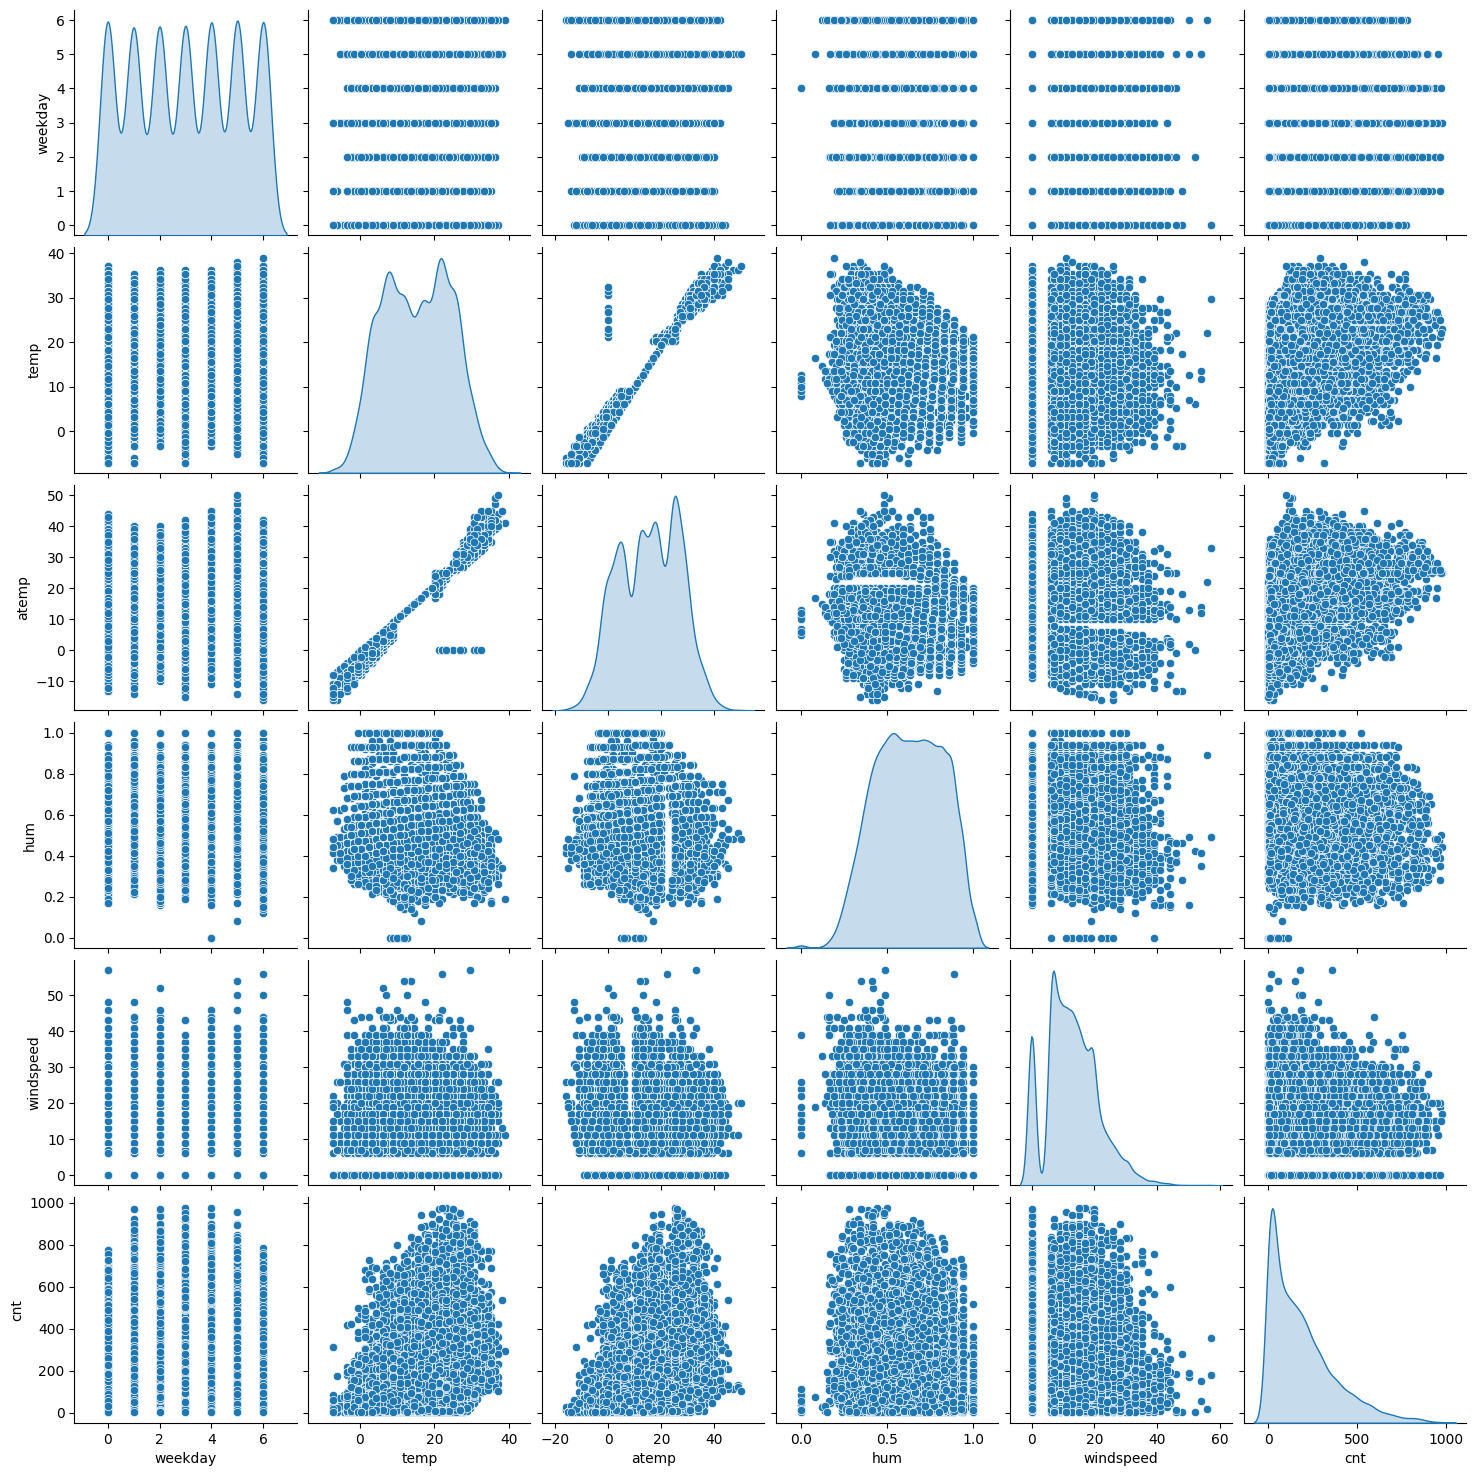

In [ ]:
sns.pairplot(train, diag_kind='kde')

In [ ]:
report = train.profile_report(html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Basado en lo observado, las transformaciones a las columnas fueron las siguientes:
* La variable a predecir presentaba un sesgo de $1.2794454$. Con el objetivo de intentar lidiar con esto, y encontrar una distribución en los datos más cercana a una gaussiana, se le aplicó a esta variable una transformación $\log(1+x)$. Como se puede observar en el *bonus en regresion polinomial*,  esto tuvo resultados negativos en la evaluación del modelo con los datos de test.
* En cuanto a la columna de 'weathersit', teniendo en cuenta la poca cantidad de datos que tenía la categoría de Heavy Rain, se combinaron las categorías Light Rain y Heavy Rain en una sola categoría: Rain. Esto tuvo resultados positivos en los resultados. En un punto durante el taller se propuso convertir esta variable en var numérica $x \in \{1, 4\}$, darle sentido de orden (suponiendo que entre peor el clima, menos probable es usar bici). Los mejores resultados estuvieron en agrupar las dos categorías.
* Se encontró una alta correlación entre datos de temp y atemp (obviamente). Teniendo en cuenta esto, inicialmente se propuso evaluar con Lasso cuál de las dos tendría una menor significancia para retirarla. Se encontró que atemp tenía un mayor impacto. Sin embargo se probó retirando una a la vez, y luego ambas. El modelo tuvo los mejores resultados cuando se dejaron ambas activas a la vez.
* Finalmente, se decidió convertir el día de la semana en una variable categórica (una categoría para cada día). Entre todas las transformaciones, esta fue la que tuvo un mayor impacto positivo. Posteriormente, intentando obtener un menor número de categorías, se agruparon los días en dos categorías: "weekDay" y "WeekEnd". Esto también tuvo resultados positivos. Aquí ocurrió algo interesante, y es el hecho de que tuvo resultados negativos en los datos de test pero negativos en los datos de train. Esto es probablemente porque le ayuda al modelo a generalizar mejor.

In [5]:
# Variable objetivo
target_feature = 'cnt'

# Variables categoricas
cat_features = ['season', 'weathersit', 'time_of_day']

In [ ]:
def preprocess_log(df: pd.DataFrame) -> tuple:
    df = df.drop_duplicates()
    X_data, y_variable = df.drop(columns=[target_feature]), np.log1p(df[target_feature])
    return X_data, y_variable

def preprocess(df: pd.DataFrame) -> tuple:
    df = df.drop_duplicates()
    X_data, y_variable = df.drop(columns=[target_feature]), df[target_feature]
    return X_data, y_variable

In [7]:
X_train, y_train = preprocess(train)
display(X_train)
display(y_train)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981   
...       ...      ...         ...    ...      ...   ...        ...   
4832   Summer        1        Mist  25.84  30.9986  0.84     6.0032   
7832     Fall        0       Clear  14.56  15.0002  0.72    16.9979   
9509   Winter        1       Clear   0.46  -2.0014  0.80     7.0015   
8799   Winter        6       Clear   7.98   5.0012  0.57    15.0013   
15063    Fall        1       Clear  16.44  17.0000  0.52     7.0015   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning  
...           ...  
4832      Morning  
7832        Night  
9509        Night  
8799      Morning  
15063       Night  

[13878 rows x 8 columns]

326       12
694       52
16787     84
13096    584
17193      9
        ... 
4832     107
7832      32
9509       2
8799     324
15063    432
Name: cnt, Length: 13878, dtype: int64

In [24]:
# Funcion que hace rename a las categorias
def change_dtypes_weekday(df):
    df['weekday'] = df['weekday'].replace({1:'WorkDay', 2:'WorkDay', 3:'WorkDay', 4:'WorkDay', 5:'WorkDay', 6:'Weekend', 0:'Weekend'})
    return df

def transform_weathersit(df):
    df['weathersit'] = df['weathersit'].replace({'Light Rain':'Rain', 'Heavy Rain':'Rain'})
    return df

**Construccion del PipeLine**

In [25]:
# cat_transformer convierte la var weathersit a numerica y luego le hace onehot encoding a las otras categoricas
cat_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])


# num_transformer reemplaza los valores ausentes por el mean para las variables numericas
num_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    
])

type_transformer = Pipeline(steps=[
    ('change_dtypes_weekday', FunctionTransformer(change_dtypes_weekday, validate=False)),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

weathersit_transformer = Pipeline(steps=[
    ('transform_weathersit', FunctionTransformer(transform_weathersit, validate=False)),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

In [26]:
def select_columns_not_type_transform(X):
    # Returns column names that are objects and not 'weathersit'
    return [col for col in X.select_dtypes(include=['object']).columns 
            if col != 'weekday']

In [27]:
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('type', type_transformer, ['weekday']),
        ('cat', cat_transformer, ['season', 'time_of_day']),
        ('num', num_transformer, ['temp', 'hum', 'windspeed', 'atemp']),
        ('weathersit', weathersit_transformer, ['weathersit'])
    ]
)

In [28]:
pipe = Pipeline(steps=[
    ('column_transformer', preprocessor_1)
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('type',
                                                  Pipeline(steps=[('change_dtypes_weekday',
                                                                   FunctionTransformer(func=<function change_dtypes_weekday at 0x00000292AE7309A0>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weekday']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['season', 'time_of_day']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'hum', 'windspeed',
                                                   'atemp']),
                                                 ('weathersit',
                                                  Pipeline(steps=[('transform_weathersit',
                                                                   FunctionTransformer(func=<function transform_weathersit at 0x0000029294246020>)),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['weathersit'])]))])

In [29]:
pipe.fit_transform(X_train)

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [30]:
# Get feature names from each transformer
weathersit_names = ['weathersit']  # From type_transformer
cat_names = pipe.named_steps['column_transformer'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out()
num_names = pipe.named_steps['column_transformer'].named_transformers_['num'].feature_names_in_
weekday_names = pipe.named_steps['column_transformer'].named_transformers_['type'].named_steps['encoder'].get_feature_names_out()
weathersit_names = pipe.named_steps['column_transformer'].named_transformers_['weathersit'].named_steps['encoder'].get_feature_names_out()

# Combine all names
col_names = list(weekday_names) + list(cat_names) + list(num_names) + list(weathersit_names)
col_names

['weekday_Weekend',
 'weekday_WorkDay',
 'season_Fall',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'time_of_day_Evening',
 'time_of_day_Morning',
 'time_of_day_Night',
 'temp',
 'hum',
 'windspeed',
 'atemp',
 'weathersit_Clear',
 'weathersit_Mist',
 'weathersit_Rain']

In [31]:
pd.DataFrame(pipe.fit_transform(X_train), columns=col_names)

weekday_Weekend  weekday_WorkDay  season_Fall  season_Spring  \
0                  1.0              0.0          0.0            0.0   
1                  0.0              1.0          0.0            0.0   
2                  0.0              1.0          1.0            0.0   
3                  0.0              1.0          0.0            0.0   
4                  0.0              1.0          0.0            0.0   
...                ...              ...          ...            ...   
13873              0.0              1.0          0.0            0.0   
13874              1.0              0.0          1.0            0.0   
13875              0.0              1.0          0.0            0.0   
13876              1.0              0.0          0.0            0.0   
13877              0.0              1.0          1.0            0.0   

       season_Summer  season_Winter  time_of_day_Evening  time_of_day_Morning  \
0                0.0            1.0                  0.0                  0.0   
1                0.0            1.0                  0.0                  1.0   
2                0.0            0.0                  0.0                  1.0   
3                1.0            0.0                  0.0                  0.0   
4                0.0            1.0                  0.0                  1.0   
...              ...            ...                  ...                  ...   
13873            1.0            0.0                  0.0                  1.0   
13874            0.0            0.0                  0.0                  0.0   
13875            0.0            1.0                  0.0                  0.0   
13876            0.0            1.0                  0.0                  1.0   
13877            0.0            0.0                  0.0                  0.0   

       time_of_day_Night      temp       hum  windspeed     atemp  \
0                    1.0 -1.752284 -0.189764  -0.822501 -1.626118   
1                    0.0 -1.752284  1.574479  -1.553142 -1.449392   
2                    0.0 -1.128279  0.640468  -0.214177 -1.184596   
3                    1.0  1.783743 -0.501101  -0.457995  1.908395   
4                    0.0 -1.648283  0.899915  -0.457995 -1.626118   
...                  ...       ...       ...        ...       ...   
13873                0.0  1.159738  1.107473  -0.822501  1.378218   
13874                1.0 -0.088271  0.484799   0.515649 -0.035587   
13875                1.0 -1.648283  0.899915  -0.700999 -1.538047   
13876                0.0 -0.816277 -0.293543   0.272646 -0.919215   
13877                1.0  0.119731 -0.552991  -0.700999  0.141138   

       weathersit_Clear  weathersit_Mist  weathersit_Rain  
0                   0.0              1.0              0.0  
1                   0.0              0.0              1.0  
2                   0.0              1.0              0.0  
3                   1.0              0.0              0.0  
4                   1.0              0.0              0.0  
...                 ...              ...              ...  
13873               0.0              1.0              0.0  
13874               1.0              0.0              0.0  
13875               1.0              0.0              0.0  
13876               1.0              0.0              0.0  
13877               1.0              0.0              0.0  

[13878 rows x 16 columns]

**Introduccion de datos nuevos**

In [32]:
# Datos de test
X_test, y_test = preprocess(test)
display(X_test)
display(y_test)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
13229  Summer        2       Clear  27.72  30.9986  0.62    12.9980   
15755    Fall        2       Clear  23.96  26.0024  0.44     6.0032   
5185   Summer        1       Clear  26.78  30.0020  0.66     7.0015   
15637    Fall        4        Mist  18.32  18.9998  0.64    22.0028   
14484  Summer        5       Clear  33.36  34.9982  0.32    11.0014   
...       ...      ...         ...    ...      ...   ...        ...   
2208   Spring        3       Clear  13.62  13.9970  0.41    19.0012   
10449  Winter        5        Mist  12.68  13.0004  0.82     8.9981   
3106   Spring        6  Light Rain  15.50  15.9968  0.94     0.0000   
7969     Fall        6       Clear   8.92   9.0008  0.62     0.0000   
1342   Winter        2       Clear   1.40  -4.0012  0.64    19.0012   

      time_of_day  
13229     Morning  
15755     Evening  
5185        Night  
15637     Evening  
14484     Evening  
...           ...  
2208        Night  
10449     Morning  
3106      Morning  
7969      Evening  
1342      Morning  

[3470 rows x 8 columns]

13229    190
15755    541
5185      72
15637    788
14484    617
        ... 
2208     102
10449    294
3106      88
7969     232
1342       2
Name: cnt, Length: 3470, dtype: int64

## Regresion polinomial
* Usar múltiples tipos de escaladores para las variables numéricas
* Usar múltiples grados para el polinomio


In [33]:
estimators_poly_best = [
    ('transform', preprocessor_1),
    ('polinomial',PolynomialFeatures()),
    ('regression', LinearRegression())
]

pipe_poly_best = Pipeline(estimators_poly_best)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              }

grid_search = GridSearchCV(pipe_poly_best, parameters, verbose=2, scoring='neg_root_mean_squared_error', cv=5)

In [34]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END ...polinomial__degree=2, transform__num=passthrough; total time=   0.0s
[CV] END ...polinomial__degree=2, trans

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('type',
                                                                         Pipeline(steps=[('change_dtypes_weekday',
                                                                                          FunctionTransformer(func=<function change_dtypes_weekday at 0x00000292AE7309A0>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weekday']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ign...
                                                                                          FunctionTransformer(func=<function transform_weathersit at 0x0000029294246020>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weathersit'])])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [35]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.079519      0.009007         0.008796        0.000400   
1       0.074432      0.003133         0.009199        0.000979   
2       0.076033      0.004522         0.008197        0.000403   
3       0.843262      0.082910         0.024303        0.000874   
4       0.762605      0.074457         0.023401        0.001498   
5       0.701198      0.133053         0.021775        0.000744   

   param_polinomial__degree param_transform__num  \
0                         2     StandardScaler()   
1                         2       MinMaxScaler()   
2                         2          passthrough   
3                         3     StandardScaler()   
4                         3       MinMaxScaler()   
5                         3          passthrough   

                                              params  split0_test_score  \
0  {'polinomial__degree': 2, 'transform__num': St...        -133.175526   
1  {'polinomial__degree': 2, 'transform__num': Mi...        -133.107122   
2  {'polinomial__degree': 2, 'transform__num': 'p...        -132.907291   
3  {'polinomial__degree': 3, 'transform__num': St...        -128.908159   
4  {'polinomial__degree': 3, 'transform__num': Mi...        -128.371121   
5  {'polinomial__degree': 3, 'transform__num': 'p...        -128.126173   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0        -131.637326        -131.861533        -135.626002        -129.614444   
1        -131.832436        -131.730244        -135.566485        -129.578413   
2        -131.410262        -131.713234        -135.307194        -129.125403   
3        -135.081499        -128.410312        -130.962857        -125.612002   
4        -134.549272        -129.964319        -131.462589        -125.906360   
5        -134.337350        -128.121178        -130.852027        -125.718470   

   mean_test_score  std_test_score  rank_test_score  
0      -132.382966        1.981818                6  
1      -132.362940        1.962235                5  
2      -132.092677        2.020450                4  
3      -129.794966        3.146817                2  
4      -130.050732        2.906358                3  
5      -129.431040        2.942539                1

In [36]:
grid_search.best_params_

{'polinomial__degree': 3, 'transform__num': 'passthrough'}

**Evaluación con conjunto de datos de Train y de Test**

In [37]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([ 26.5689497 ,  58.77837229, 232.71428967, ...,  -3.66324329,
       184.51905346, 213.11791515])

In [38]:
n,p = X_train.shape

print('------------ Regresión Polinomial con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train, y_pred_train))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train, y_pred_train) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Polinomial con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Polinomial con entrenamiento------------
Residual sum of squares (MSE): 15704.58
Root of sum of squares (RMSE): 125.32
R2-score: 0.52440
Adj R2-score: 0.52413
------------ Regresión Polinomial con evaluación ------------
Residual sum of squares (MSE): 16403.02
Root of sum of squares (RMSE): 128.07
R2-score: 0.49402
Adj R2-score: 0.49285


### Bonus: 
Como la variable a predecir tiene un sesgo hacia la izquierda, le aplicamos una pequena transformacion a la hora de realizar el preprocesado. Con esto, volveremos a analizar los resultados.

In [62]:
X_train, y_train_log = preprocess_log(train)
display(X_train)
display(y_train_log)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
326    Winter        6        Mist  -0.48  -2.9980  0.59     6.0032   
694    Winter        2  Light Rain  -0.48  -0.9982  0.93     0.0000   
16787    Fall        5        Mist   5.16   1.9982  0.75    11.0014   
13096  Summer        3       Clear  31.48  36.9980  0.53     8.9981   
17193  Winter        1       Clear   0.46  -2.9980  0.80     8.9981   
...       ...      ...         ...    ...      ...   ...        ...   
4832   Summer        1        Mist  25.84  30.9986  0.84     6.0032   
7832     Fall        0       Clear  14.56  15.0002  0.72    16.9979   
9509   Winter        1       Clear   0.46  -2.0014  0.80     7.0015   
8799   Winter        6       Clear   7.98   5.0012  0.57    15.0013   
15063    Fall        1       Clear  16.44  17.0000  0.52     7.0015   

      time_of_day  
326         Night  
694       Morning  
16787     Morning  
13096       Night  
17193     Morning  
...           ...  
4832      Morning  
7832        Night  
9509        Night  
8799      Morning  
15063       Night  

[13878 rows x 8 columns]

326      2.564949
694      3.970292
16787    4.442651
13096    6.371612
17193    2.302585
           ...   
4832     4.682131
7832     3.496508
9509     1.098612
8799     5.783825
15063    6.070738
Name: cnt, Length: 13878, dtype: float64

In [63]:
# Datos de test
X_test, y_test_log = preprocess_log(test)
display(X_test)
display(y_test_log)

season  weekday  weathersit   temp    atemp   hum  windspeed  \
13229  Summer        2       Clear  27.72  30.9986  0.62    12.9980   
15755    Fall        2       Clear  23.96  26.0024  0.44     6.0032   
5185   Summer        1       Clear  26.78  30.0020  0.66     7.0015   
15637    Fall        4        Mist  18.32  18.9998  0.64    22.0028   
14484  Summer        5       Clear  33.36  34.9982  0.32    11.0014   
...       ...      ...         ...    ...      ...   ...        ...   
2208   Spring        3       Clear  13.62  13.9970  0.41    19.0012   
10449  Winter        5        Mist  12.68  13.0004  0.82     8.9981   
3106   Spring        6  Light Rain  15.50  15.9968  0.94     0.0000   
7969     Fall        6       Clear   8.92   9.0008  0.62     0.0000   
1342   Winter        2       Clear   1.40  -4.0012  0.64    19.0012   

      time_of_day  
13229     Morning  
15755     Evening  
5185        Night  
15637     Evening  
14484     Evening  
...           ...  
2208        Night  
10449     Morning  
3106      Morning  
7969      Evening  
1342      Morning  

[3470 rows x 8 columns]

13229    5.252273
15755    6.295266
5185     4.290459
15637    6.670766
14484    6.426488
           ...   
2208     4.634729
10449    5.686975
3106     4.488636
7969     5.451038
1342     1.098612
Name: cnt, Length: 3470, dtype: float64

In [64]:
estimators_poly_best = [
    ('transform', preprocessor_1),
    ('polinomial',PolynomialFeatures()),
    ('regression', LinearRegression())
]

pipe_poly_best = Pipeline(estimators_poly_best)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              }

grid_search = GridSearchCV(pipe_poly_best, parameters, verbose=2, scoring='neg_root_mean_squared_error', cv=5)

In [65]:
%%time
grid_search.fit(X_train, y_train_log)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.2s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.2s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.3s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.1s
[CV] END polinomial__degree=2, transform__num=StandardScaler(); total time=   0.1s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.1s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.1s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.1s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.1s
[CV] END polinomial__degree=2, transform__num=MinMaxScaler(); total time=   0.1s
[CV] END ...polinomial__degree=2, transform__num=passthrough; total time=   0.1s
[CV] END ...polinomial__degree=2, trans

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('type',
                                                                         Pipeline(steps=[('change_dtypes_weekday',
                                                                                          FunctionTransformer(func=<function change_dtypes_weekday at 0x00000292AE7309A0>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weekday']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ign...
                                                                                          FunctionTransformer(func=<function transform_weathersit at 0x0000029294246020>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weathersit'])])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [66]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.246802      0.081075         0.009856        0.001243   
1       0.181062      0.025147         0.009718        0.000749   
2       0.179649      0.014021         0.009282        0.001074   
3       1.776237      0.309448         0.030211        0.002725   
4       1.813810      0.136514         0.028617        0.001312   
5       1.647163      0.110543         0.030517        0.003625   

   param_polinomial__degree param_transform__num  \
0                         2     StandardScaler()   
1                         2       MinMaxScaler()   
2                         2          passthrough   
3                         3     StandardScaler()   
4                         3       MinMaxScaler()   
5                         3          passthrough   

                                              params  split0_test_score  \
0  {'polinomial__degree': 2, 'transform__num': St...          -1.005512   
1  {'polinomial__degree': 2, 'transform__num': Mi...          -1.006195   
2  {'polinomial__degree': 2, 'transform__num': 'p...          -1.004967   
3  {'polinomial__degree': 3, 'transform__num': St...          -0.990103   
4  {'polinomial__degree': 3, 'transform__num': Mi...          -0.990857   
5  {'polinomial__degree': 3, 'transform__num': 'p...          -0.989705   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0          -0.971047          -0.992279          -0.980107          -1.002988   
1          -0.971000          -0.992299          -0.980433          -1.003167   
2          -0.969966          -0.991823          -0.979121          -1.000888   
3          -1.003520          -1.001718          -0.949138          -0.978368   
4          -0.999060          -1.010699          -0.953910          -0.981015   
5          -1.000142          -1.000763          -0.947918          -0.978778   

   mean_test_score  std_test_score  rank_test_score  
0        -0.990387        0.013197                5  
1        -0.990619        0.013353                6  
2        -0.989353        0.013141                4  
3        -0.984570        0.019888                2  
4        -0.987108        0.019249                3  
5        -0.983461        0.019503                1

In [67]:
grid_search.best_params_

{'polinomial__degree': 3, 'transform__num': 'passthrough'}

In [68]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([2.86700008, 3.571178  , 5.07375595, ..., 1.74795893, 4.57907853,
       5.29060409])

In [70]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(np.expm1(y_train_log), np.expm1(y_pred_train)))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(np.expm1(y_train_log), np.expm1(y_pred_train)) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train_log, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train_log, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test)))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_test)) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test_log, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test_log, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 17858.38
Root of sum of squares (RMSE): 133.64
R2-score: 0.55055
Adj R2-score: 0.55029
------------ Regresión Lasso con evaluación ------------
Residual sum of squares (MSE): 18355.84
Root of sum of squares (RMSE): 135.48
R2-score: 0.51830
Adj R2-score: 0.51719


Soy consiente de que los dos RMSE no son comparables, pero fijandonos en el R2, se evidencia una mejora.

# 2.3 Regresión Lineal con Reguilarización L1

In [47]:
estimators_lasso_best = [
    ('transform', preprocessor_1),
    ('regression', Lasso())
]

pipe_lasso_best = Pipeline(estimators_lasso_best)

# Parametros de la busqueda
parameters = {
              'regression__alpha':[1,2,3,4,5],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
             }

grid_search = GridSearchCV(pipe_lasso_best, parameters, verbose=2, scoring='neg_root_mean_squared_error', cv=5)

In [48]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END regression__alpha=1, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__alpha=1, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__alpha=1, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__alpha=1, transform__num=StandardScaler(); total time=   0.0s
[CV] END regression__alpha=1, transform__num=StandardScaler(); total time=   0.0s
[CV] END .regression__alpha=1, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END .regression__alpha=1, transform__num=MinMaxScaler(); total time=   0.1s
[CV] END .regression__alpha=1, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END .regression__alpha=1, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END .regression__alpha=1, transform__num=MinMaxScaler(); total time=   0.0s
[CV] END ....regression__alpha=1, transform__num=passthrough; total time=   0.1s
[CV] END ....regression__alpha=1, transform

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('type',
                                                                         Pipeline(steps=[('change_dtypes_weekday',
                                                                                          FunctionTransformer(func=<function change_dtypes_weekday at 0x00000292AE7309A0>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weekday']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ign...
                                                                         Pipeline(steps=[('transform_weathersit',
                                                                                          FunctionTransformer(func=<function transform_weathersit at 0x0000029294246020>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weathersit'])])),
                                       ('regression', Lasso())]),
             param_grid={'regression__alpha': [1, 2, 3, 4, 5],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [49]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.103971      0.020812         0.006002        0.000002   
1        0.074458      0.043328         0.006001        0.000001   
2        0.093342      0.038087         0.005601        0.000491   
3        0.116695      0.013323         0.006200        0.000748   
4        0.021901      0.002289         0.006202        0.000980   
5        0.093600      0.027404         0.005601        0.000490   
6        0.086829      0.017412         0.005799        0.000400   
7        0.018301      0.001076         0.005401        0.000490   
8        0.080502      0.008002         0.005600        0.000490   
9        0.118000      0.061240         0.006201        0.000748   
10       0.020399      0.001959         0.005600        0.000491   
11       0.133820      0.077561         0.005801        0.000400   
12       0.084800      0.014246         0.005802        0.000399   
13       0.017422      0.002002         0.005601        0.000491   
14       0.066619      0.004311         0.005401        0.000490   

    param_regression__alpha param_transform__num  \
0                         1     StandardScaler()   
1                         1       MinMaxScaler()   
2                         1          passthrough   
3                         2     StandardScaler()   
4                         2       MinMaxScaler()   
5                         2          passthrough   
6                         3     StandardScaler()   
7                         3       MinMaxScaler()   
8                         3          passthrough   
9                         4     StandardScaler()   
10                        4       MinMaxScaler()   
11                        4          passthrough   
12                        5     StandardScaler()   
13                        5       MinMaxScaler()   
14                        5          passthrough   

                                               params  split0_test_score  \
0   {'regression__alpha': 1, 'transform__num': Sta...        -136.945970   
1   {'regression__alpha': 1, 'transform__num': Min...        -137.543352   
2   {'regression__alpha': 1, 'transform__num': 'pa...        -137.117266   
3   {'regression__alpha': 2, 'transform__num': Sta...        -137.288238   
4   {'regression__alpha': 2, 'transform__num': Min...        -138.725501   
5   {'regression__alpha': 2, 'transform__num': 'pa...        -137.769199   
6   {'regression__alpha': 3, 'transform__num': Sta...        -137.657873   
7   {'regression__alpha': 3, 'transform__num': Min...        -140.216445   
8   {'regression__alpha': 3, 'transform__num': 'pa...        -138.780338   
9   {'regression__alpha': 4, 'transform__num': Sta...        -137.952981   
10  {'regression__alpha': 4, 'transform__num': Min...        -141.741468   
11  {'regression__alpha': 4, 'transform__num': 'pa...        -139.945085   
12  {'regression__alpha': 5, 'transform__num': Sta...        -138.352771   
13  {'regression__alpha': 5, 'transform__num': Min...        -143.603740   
14  {'regression__alpha': 5, 'transform__num': 'pa...        -141.293846   

    split1_test_score  split2_test_score  split3_test_score  \
0         -137.218177        -135.868791        -140.709953   
1         -137.298988        -136.552563        -141.236822   
2         -137.140526        -135.936923        -140.824921   
3         -137.786293        -136.218574        -141.180766   
4         -138.185498        -137.463851        -142.369199   
5         -137.779010        -136.428476        -141.523625   
6         -138.279749        -136.546519        -141.689795   
7         -139.491301        -138.679005        -143.792363   
8         -138.668928        -137.284639        -142.563441   
9         -138.703045        -136.817199        -142.101807   
10        -140.866321        -139.884475        -145.246722   
11        -139.676762        -138.268895        -143.778709   
12        -139.235147        -137.192365      

In [50]:
grid_search.best_params_

{'regression__alpha': 1, 'transform__num': StandardScaler()}

In [51]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([-11.32118482,  17.82262489, 146.40572031, ..., -36.39132607,
       141.12551116, 164.30364502])

In [52]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train, y_pred_train))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_train, y_pred_train) ** (1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test))
print("Root of sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test) ** (1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 18773.98
Root of sum of squares (RMSE): 137.02
R2-score: 0.43145
Adj R2-score: 0.43112
------------ Regresión Lasso con evaluación ------------
Residual sum of squares (MSE): 18763.35
Root of sum of squares (RMSE): 136.98
R2-score: 0.42121
Adj R2-score: 0.41987


In [53]:
coef_lr = dict(zip(col_names, best_model["regression"].coef_))
for k,v in coef_lr.items():
    print(f'{k} = {v:,.2f}')

weekday_Weekend = -0.00
weekday_WorkDay = 0.00
season_Fall = 32.25
season_Spring = 0.00
season_Summer = -12.65
season_Winter = -21.53
time_of_day_Evening = 82.01
time_of_day_Morning = -0.00
time_of_day_Night = -99.79
temp = 18.48
hum = -30.84
windspeed = -0.04
atemp = 41.35
weathersit_Clear = 2.97
weathersit_Mist = -0.00
weathersit_Rain = -23.58


## 2.4. Búsqueda del mejor modelo
Haciendo uso de un GridSearch CV por el rango de parámetros sugerido por el taller

In [71]:
estimators_best = [
    ('transform', preprocessor_1),
    ('polinomial', PolynomialFeatures()),
    ('regression', Lasso())
]

pipe_best = Pipeline(estimators_best)

# Parametros de la busqueda
parameters = {
              'polinomial__degree':[2,3],
              'regression__alpha': [0.001, 0.01, 0.1, 1],
              'transform__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
              #'transform__cat': [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=0)]
              }

grid_search = GridSearchCV(pipe_best, parameters, verbose=2, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)

In [72]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 5min 34s
Wall time: 3min 8s


C:\Users\alman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.307e+07, tolerance: 4.583e+04
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('type',
                                                                         Pipeline(steps=[('change_dtypes_weekday',
                                                                                          FunctionTransformer(func=<function change_dtypes_weekday at 0x00000292AE7309A0>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weekday']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ign...
                                                                                          FunctionTransformer(func=<function transform_weathersit at 0x0000029294246020>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['weathersit'])])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', Lasso())]),
             n_jobs=-1,
             param_grid={'polinomial__degree': [2, 3],
                         'regression__alpha': [0.001, 0.01, 0.1, 1],
                         'transform__num': [StandardScaler(), MinMaxScaler(),
                                            'passthrough']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [73]:
best_model = grid_search.best_estimator_

pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.691617      0.631098         0.066417        0.035648   
1        5.026888      0.850309         0.049829        0.011881   
2        4.582919      0.782959         0.050501        0.010654   
3        4.650713      0.465849         0.056722        0.016372   
4        4.598314      0.793532         0.081960        0.032458   
5        4.867806      1.052440         0.073463        0.022902   
6        3.817631      1.181438         0.074266        0.031481   
7        4.158043      0.944379         0.061702        0.011358   
8        4.915337      1.074040         0.082732        0.045639   
9        1.176432      0.231859         0.067549        0.016913   
10       0.918177      0.293301         0.049167        0.013388   
11       4.832386      0.968548         0.058094        0.009909   
12      28.502803      1.896247         0.152848        0.052083   
13      25.088024      1.831950         0.128330        0.041265   
14      27.963908      2.047583         0.130591        0.039095   
15      24.196845      1.209770         0.148328        0.063226   
16      26.142481      3.816053         0.210355        0.089613   
17      29.367623      0.885175         0.163093        0.073779   
18      28.344574      2.767646         0.176937        0.039554   
19      25.205710      4.088972         0.191947        0.053024   
20      28.711221      1.662683         0.178498        0.044331   
21      17.600132      6.696933         0.172467        0.065713   
22       6.094944      0.893504         0.202449        0.059825   
23      15.582315      1.233961         0.050523        0.025189   

    param_polinomial__degree  param_regression__alpha param_transform__num  \
0                          2                    0.001     StandardScaler()   
1                          2                    0.001       MinMaxScaler()   
2                          2                    0.001          passthrough   
3                          2                    0.010     StandardScaler()   
4                          2                    0.010       MinMaxScaler()   
5                          2                    0.010          passthrough   
6                          2                    0.100     StandardScaler()   
7                          2                    0.100       MinMaxScaler()   
8                          2                    0.100          passthrough   
9                          2                    1.000     StandardScaler()   
10                         2                    1.000       MinMaxScaler()   
11                         2                    1.000          passthrough   
12                         3                    0.001     StandardScaler()   
13                         3                    0.001       MinMaxScaler()   
14                         3                    0.001          passthrough   
15                         3                    0.010     StandardScaler()   
16                         3                    0.010       MinMaxScaler()   
17                         3                    0.010          passthrough   
18                         3                    0.100     StandardScaler()   
19                         3                    0.100       MinMaxScaler()   
20                         3                    0.100          passthrough   
21                         3                    1.000     StandardScaler()   
22                         3                    1.000       MinMaxScaler()   
23                         3                    1.000          passthrough   

                                               params  split0_test_score  \
0   {'polinomial__degree': 2, 'regression__alpha':...        -132.884928   
1   {'polinomial__degree': 2, 'regression__alpha':...        -132.843434   
2   {'polinomial__degree': 2, 'regression__alpha':...        -132.889018   
3   {'polinomial__degree': 2, 'regression__alpha

In [74]:
grid_search.best_params_

{'polinomial__degree': 3,
 'regression__alpha': 0.001,
 'transform__num': MinMaxScaler()}

In [75]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_pred_train

array([ 19.3536583 , 104.15066573, 232.1048785 , ...,  -0.51772073,
       177.28014167, 211.1339371 ])

In [76]:
n,p = X_train.shape

print('------------ Regresión Lasso con entrenamiento------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_train, y_pred_train))
print("Square Root of Residual sum of squares (RMSE): %.2f" % mean_squared_error(y_train, y_pred_train)**(1/2))
print("R2-score: %.5f" % r2_score(y_train, y_pred_train) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_train, y_pred_train))*(n-1)/(n-p-1)) )

n,p = X_test.shape

print('------------ Regresión Lasso con evaluación ------------')
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test, y_pred_test))
print("Square Root of Residual sum of squares (RMSE): %.2f" % mean_squared_error(y_test, y_pred_test)**(1/2))
print("R2-score: %.5f" % r2_score(y_test, y_pred_test) )
print("Adj R2-score: %.5f" % ( 1-(1-r2_score(y_test, y_pred_test))*(n-1)/(n-p-1)) )

------------ Regresión Lasso con entrenamiento------------
Residual sum of squares (MSE): 15778.75
Square Root of Residual sum of squares (RMSE): 125.61
R2-score: 0.52216
Adj R2-score: 0.52188
------------ Regresión Lasso con evaluación ------------
Residual sum of squares (MSE): 16302.26
Square Root of Residual sum of squares (RMSE): 127.68
R2-score: 0.49713
Adj R2-score: 0.49596
